In [1]:
# load dependencies
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import tokenize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [423]:
def return_dialog(sub):
    """
    Returns the dialog of the .srt file sub.
    Input :
        sub : name of the .srt file as a string, ex. 's01e01.srt'
    Output :
        dialog : dialog contained in .srt file as a single string
    """
    lines = []
    with open(sub) as file:
        # check the starting line of the dialog
        if sub == 'special.srt':
            start = 2
        elif int(sub[2]) == 1:   
            start = 2
        elif int(sub[2]) == 2:
            start = 7
        else:
            start = 12
        for index,line in enumerate(file):
            if index >= start:
                # check if line contains dialog
                if (index == start) or ((index == start+1) and (len(line.split()) != 0)):
                    lines.append(line.strip('\n').replace('\'',''))
                    space_index = index
                if ((index > space_index + 2) and (len(line.split()) != 0)):
                    lines.append(line.strip('\n').replace('\'',''))
                if (len(line.split()) == 0):
                    space_index = index
    # output the dialog as a single string, removing the last two lines which contain attribution
    return ' '.join(lines[:-2])

In [424]:
# construct a list of string filenames for the subtitles
subs = ['s0'+str(i)+'e0'+str(j)+'.srt' for i in range(1,4) for j in range(1,4)]
subs = subs + ['s03e0' + str(k)+'.srt' for k in range(4,7)]
subs.insert(6,'special.srt')

In [425]:
# call the VADER analysis object 
analyzer = SentimentIntensityAnalyzer()

# calculate the VADER polarity of each subtitle file as a whole
# this doesn't really work out well since the output is ~-1 or ~1
# VADER works best for short text, like sentences, not whole documents
pols = []
for sub in subs:
    di = return_dialog(sub)
    pols.append(analyzer.polarity_scores(di)['compound'])
print(pols)

[-0.9755, 0.9998, 0.9999, 0.9986, -0.9172, 0.9998, 0.9999, 1.0, 0.9999, 0.9989, 0.9996, -0.9965, -0.999]


In [158]:
# look at a sample dialog output of return_dialog
di

'Hello. Just tell me whats happened. And what is it? Ill be right down. Whats happened? Susannah. Susannah? Princess Susannah. Is she all right? Dont know. Dont kill me. Please dont kill me. Read the statement. Yes. All right. On this screen? That is correct. Duchess of Beaumont. Popularly known as Princess Susannah. I am in a place you... cannot find, held by one you will not trace. Prime Minister Michael Callow... Prime Minister Michael Callow my life... ..my life depends on you. If you do not do precisely as instructed by... by 4pm this afternoon, I will be... ..I will be executed. Please. What are you doing? Keep it going. Prime Minister, at this point, I think its important to say that we are 100% certain that this is, indeed, Princess Susannah. Her car was intercepted shortly after midnight, returning from the wedding of a college friend. Shed insisted on going. But you had security on her? Two PPOs, still unconscious. Heavy sedative, close range, each with a single puncture woun

In [428]:
# build a dictionary of sub name to episode title
names = {
    subs[0]: 'The National Anthem',
    subs[1]: 'Fifteen Million Merits',
    subs[2]: 'The Entire History of You',
    subs[3]: 'Be Right Back',
    subs[4]: 'White Bear',
    subs[5]: 'The Waldo Moment',
    subs[6]: 'White Christmas',
    subs[7]: 'Nosedive',
    subs[8]: 'Playtest',
    subs[9]: 'Shut Up and Dance',
    subs[10]: 'San Junipero',
    subs[11]: 'Men Against Fire',
    subs[12]: 'Hated in the Nation'
}

# rows will contain the rows of the data frame containing the sentences in each subtitle file
rows = []

for sub in subs:
    print(sub)
    di = return_dialog(sub)
    sen = tokenize.sent_tokenize(di)
    for s in sen:
        pol = analyzer.polarity_scores(s)['compound']
        # check if sentence s has sentiment/ nonzero polarity
        if pol != 0:
            # check the polarity of the sentence; if positive, it is considered positive.
            # append a dictionary with info regarding the sentence into rows
            rows.append({'Episode': sub, 'Name': names[sub], 'Sentence':s, 'Score': pol, 'isPos': pol>0})
            
# convert the rows into a dataframe for easier plotting and analysis
df = pd.DataFrame(rows)

print(df.head())

s01e01.srt
s01e02.srt
s01e03.srt
s02e01.srt
s02e02.srt
s02e03.srt
special.srt
s03e01.srt
s03e02.srt
s03e03.srt
s03e04.srt
s03e05.srt
s03e06.srt
      Episode                 Name   Score  \
0  s01e01.srt  The National Anthem -0.4215   
1  s01e01.srt  The National Anthem -0.6908   
2  s01e01.srt  The National Anthem  0.7217   
3  s01e01.srt  The National Anthem  0.4019   
4  s01e01.srt  The National Anthem  0.4215   

                                Sentence  isPos  
0                     Ill be right down.  False  
1                          Dont kill me.  False  
2                   Please dont kill me.   True  
3                                   Yes.   True  
4  Popularly known as Princess Susannah.   True  


<IPython.core.display.Javascript object>


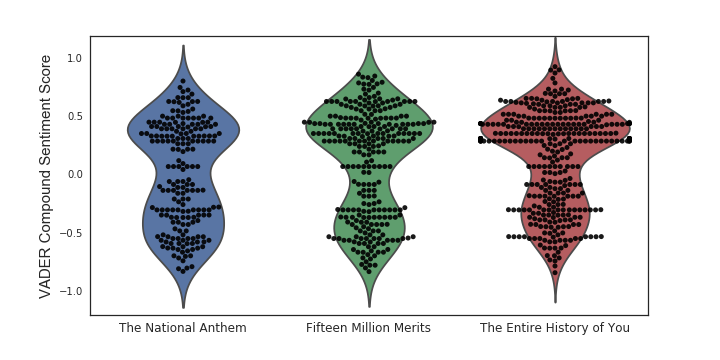

In [392]:
# plot a violinplot and swarmplot for each episode

# plot first season episodes
plt.close()
plt.figure(figsize=(10,5))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Name',y='Score',data=df[df['Episode'].isin(subs[:3])],inner=None)
sns.swarmplot(x="Name", y="Score",data=df[df['Episode'].isin(subs[:3])], color="black", alpha=.9);
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1.png')

<IPython.core.display.Javascript object>


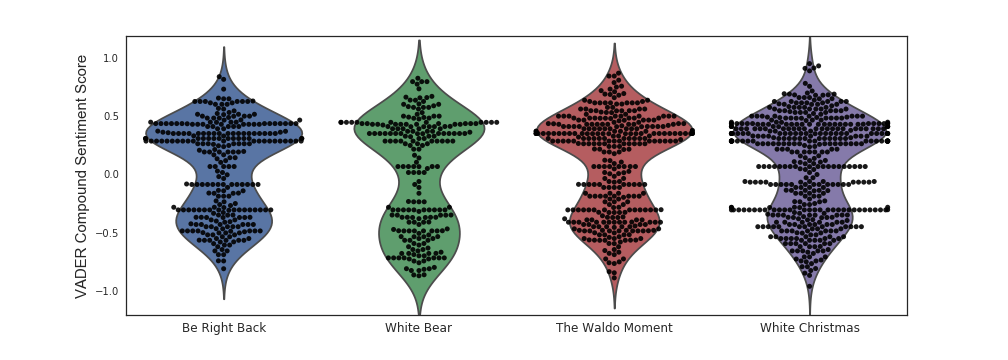

In [391]:
# plot second season episodes + Christmas special
plt.close()
plt.figure(figsize=(14,5))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Name',y='Score',data=df[df['Episode'].isin(subs[3:7])],inner=None)
sns.swarmplot(x="Name", y="Score",data=df[df['Episode'].isin(subs[3:7])], color="black", alpha=.9);
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season2.png')

<IPython.core.display.Javascript object>


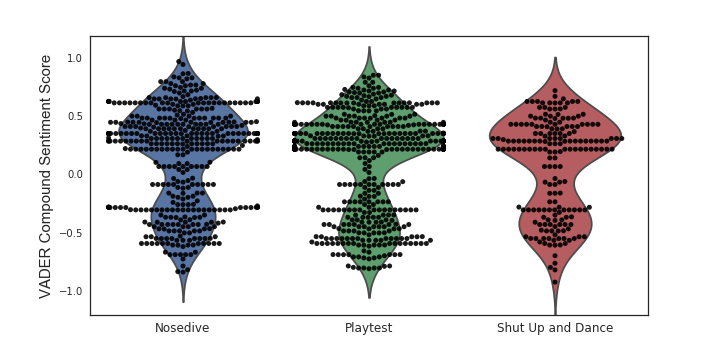

In [393]:
# plot first three episodes of third season
plt.close()
plt.figure(figsize=(10,5))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Name',y='Score',data=df[df['Episode'].isin(subs[7:10])],inner=None)
sns.swarmplot(x="Name", y="Score",data=df[df['Episode'].isin(subs[7:10])], color="black", alpha=.9);
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season3p1.png')

<IPython.core.display.Javascript object>


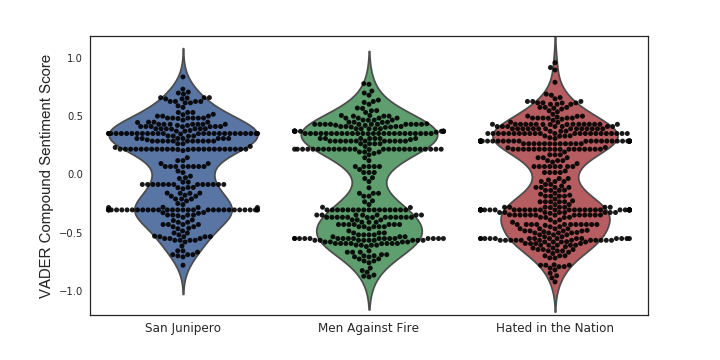

In [394]:
# plot last three episodes of third season
plt.close()
plt.figure(figsize=(10,5))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Name',y='Score',data=df[df['Episode'].isin(subs[10:])],inner=None)
sns.swarmplot(x="Name", y="Score",data=df[df['Episode'].isin(subs[10:])], color="black", alpha=.9);
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season3p2.png')

In [420]:
# rank the episodes according to the mean of their sentiment distribution (MA)
df.groupby('Name')['Score'].mean().sort_values()

Name
Hated in the Nation         -0.038356
Men Against Fire            -0.033360
The National Anthem          0.011490
White Bear                   0.014890
Be Right Back                0.066229
San Junipero                 0.073930
Shut Up and Dance            0.082851
White Christmas              0.084734
The Waldo Moment             0.094018
Fifteen Million Merits       0.117146
Playtest                     0.122860
The Entire History of You    0.151584
Nosedive                     0.160238
Name: Score, dtype: float64

In [421]:
# rank the episodes according to the mean polarity score of their positive sentences (MP)
df[df['isPos']==True].groupby('Name')['Score'].mean().sort_values()

Name
Men Against Fire             0.354639
Hated in the Nation          0.358809
San Junipero                 0.367191
Shut Up and Dance            0.376019
Be Right Back                0.378982
White Christmas              0.392119
Playtest                     0.401232
White Bear                   0.403600
The National Anthem          0.403621
The Waldo Moment             0.404735
The Entire History of You    0.421205
Fifteen Million Merits       0.436726
Nosedive                     0.439431
Name: Score, dtype: float64

In [422]:
# rank the episodes according to the mean polarity score of their negative sentences (MN)
df[df['isPos']==False].groupby('Name')['Score'].mean().sort_values()

Name
White Bear                  -0.503390
Men Against Fire            -0.467164
Fifteen Million Merits      -0.434286
Playtest                    -0.430648
Hated in the Nation         -0.414516
Shut Up and Dance           -0.405764
The National Anthem         -0.401064
Nosedive                    -0.377943
The Waldo Moment            -0.369899
White Christmas             -0.369392
Be Right Back               -0.360946
The Entire History of You   -0.353956
San Junipero                -0.323712
Name: Score, dtype: float64